# 6.4 Supervised Machine Learning: Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
# import the data files and assign to a dataframe

# setup path to cleaned dataset
path = r'C:\Users\nicol\Chocolate Bar Analysis'
df_cocoa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

# 2. Data Wrangling

In [5]:
df_cocoa

,Unnamed: 0,Company,Specific Bean Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Unknown,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Unknown,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Unknown,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Unknown,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Unknown,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Zotter,Peru,647,2011,70%,Austria,3.75,Unknown,Peru
1791,1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,Unknown,India


In [6]:
df_cocoa.shape

(1795, 10)

In [7]:
df_cocoa.columns

Index(['Unnamed: 0', 'Company', 'Specific Bean Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Broad Bean Origin'],
      dtype='object')

In [8]:
df_cocoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1795 non-null   int64  
 1   Company               1795 non-null   object 
 2   Specific Bean Origin  1795 non-null   object 
 3   REF                   1795 non-null   int64  
 4   Review Date           1795 non-null   int64  
 5   Cocoa Percent         1795 non-null   object 
 6   Company Location      1795 non-null   object 
 7   Rating                1795 non-null   float64
 8   Bean Type             1795 non-null   object 
 9   Broad Bean Origin     1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [9]:
df_cocoa.dtypes

Unnamed: 0                int64
Company                  object
Specific Bean Origin     object
REF                       int64
Review Date               int64
Cocoa Percent            object
Company Location         object
Rating                  float64
Bean Type                object
Broad Bean Origin        object
dtype: object

# 3-4. Checking for extreme values & visualizations

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


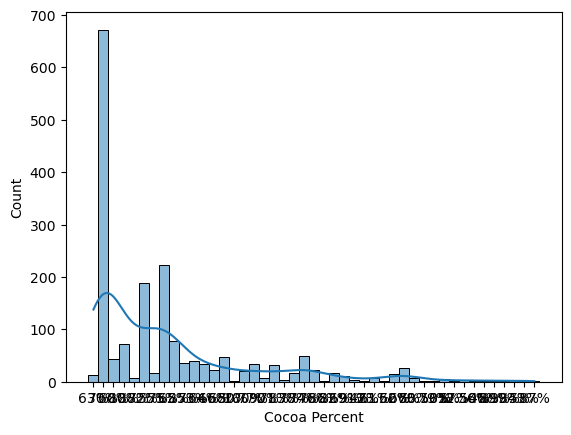

In [10]:
#Created a histogram for extreme values for Cocoa Percent
hist_price = sns.histplot(df_cocoa['Cocoa Percent'], bins = 20, kde = True)

C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nicol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


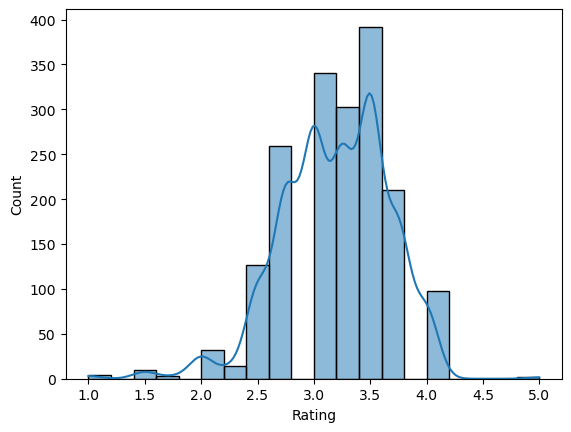

In [11]:
#Created a histogram for extreme values for Rating
hist_price = sns.histplot(df_cocoa['Rating'], bins = 20, kde = True)

# 5. State your hypothesis in a markdown cell within your Jupyter notebook

I hypothesize that the higher the Cocoa Percentage, the lower the average rating.

# 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable

In [12]:
# Remove the '%' sign and convert to float for Cocoa Percent column
df_cocoa['Cocoa Percent'] = df_cocoa['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

In [13]:
X = df_cocoa['Cocoa Percent'].values.reshape(-1,1)
y = df_cocoa['Rating'].values.reshape(-1,1)

In [14]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [15]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [16]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# Create a regression object.

regression = LinearRegression() 

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

# 9. Create a plot that shows the regression line on the test set.


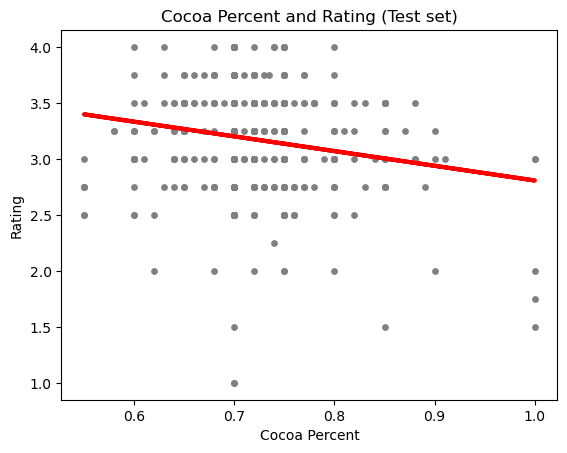

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent and Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

#### the regression line appears to have a negative slope meaning that the higher the Cocoa Percentage, the lower the average Rating.

# 11. Check the model performance statistics—MSE and R2 score.


In [21]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.20953513101526214
R2 score:  0.01811002046167498


In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


#### I think there there is possible bias due to the person rating. Given the similiar values on the rating, there is not enough variance to make a reasonable judgement.

# 12. Compare the predicted y values with the actual y values in a dataframe.


In [26]:
X_1 = df_cocoa['Cocoa Percent'].values.reshape(-1,1)
y_1 = df_cocoa['Rating'].values.reshape(-1,1)

In [29]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

In [30]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


#### the predicted values compared to actual values do not line up.